## Importing libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd

import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import statsmodels.api as sm

# special matplotlib argument for improved plots
from matplotlib import rcParams
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge,Lasso

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


In [2]:
data = pd.read_csv('Diamond_Price.csv')
data.head()

,Unnamed: 0,X,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
0,1,1,1.08,E,VS1,68.6,6693.3,7228.8
1,2,2,0.31,F,VVS1,61.9,3159.0,979.3
2,3,3,0.32,F,VVS1,60.8,3159.0,1010.9
3,4,4,0.33,D,IF,60.8,4758.8,1570.4
4,5,5,0.33,G,VVS1,61.5,2895.8,955.6


In [3]:
data.shape

(307, 8)

In [4]:
data1=data.drop(["Unnamed: 0", "X"],axis=1)
data1

,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
0,1.08,E,VS1,68.6,6693.3,7228.8
1,0.31,F,VVS1,61.9,3159.0,979.3
2,0.32,F,VVS1,60.8,3159.0,1010.9
3,0.33,D,IF,60.8,4758.8,1570.4
4,0.33,G,VVS1,61.5,2895.8,955.6
...,...,...,...,...,...,...
302,1.52,F,SI2,63.4,4826.3,7335.9
303,0.97,G,VVS1,70.0,5177.3,5021.9
304,1.25,G,VS2,71.9,5607.9,7009.9
305,1.52,F,VS1,70.4,7634.3,11604.1


In [5]:
data1.isnull().T.any().T.sum()

0

In [6]:
data1.isna().any()

Carat         False
Color         False
Clarity       False
Depth         False
PricePerCt    False
TotalPrice    False
dtype: bool

In [7]:
! pip install pandas-profiling

## Generating a quick report of Dataset

In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(data1)
profile.to_file(output_file="daimonds.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Carat       307 non-null    float64
 1   Color       307 non-null    object 
 2   Clarity     307 non-null    object 
 3   Depth       307 non-null    float64
 4   PricePerCt  307 non-null    float64
 5   TotalPrice  307 non-null    float64
dtypes: float64(4), object(2)
memory usage: 14.5+ KB


In [11]:
data1.describe()

,Carat,Depth,PricePerCt,TotalPrice
count,307.000000,307.000000,307.000000,307.000000
mean,0.973094,64.446580,6292.845277,7381.345928
std,0.493946,5.174909,2969.074593,8000.251838
min,0.310000,58.200000,1782.000000,853.300000
25%,0.630000,61.200000,4212.000000,2759.850000
50%,0.820000,62.000000,5197.500000,4243.800000
75%,1.220000,68.650000,7987.950000,9298.800000
max,3.350000,79.200000,17671.500000,56454.400000


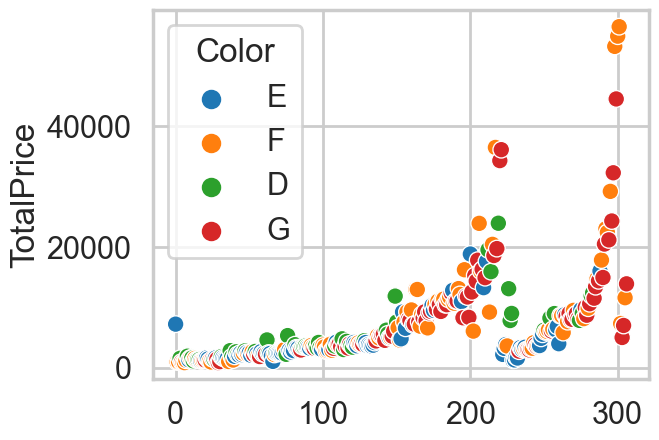

correlation  0.24043799921763423


In [12]:
#Encode the status as number then use the dataframe pearson correlation function to return the correlation
from sklearn.preprocessing import LabelEncoder
x=range(len(data1))
sns.scatterplot(x=x, y='TotalPrice',data=data1,hue='Color')
plt.show()
encoder=LabelEncoder()
encoder.fit(data1['Color'])
data1['Color_enc']=encoder.transform(data1['Color'])
corr=data1['TotalPrice'].corr(data1['Color_enc'])
print("correlation ",corr)



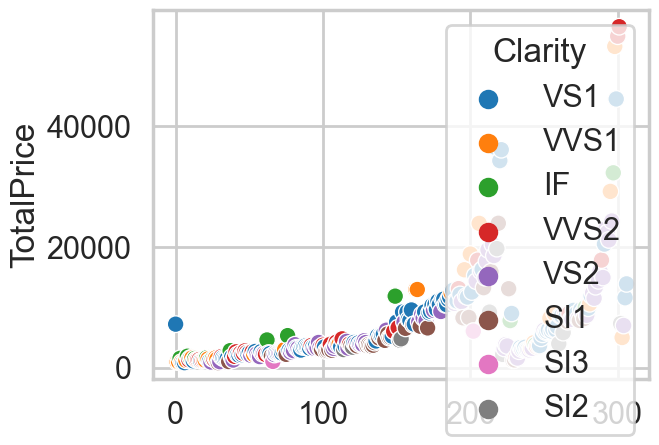

correlation  0.08693552093508636


In [13]:
from sklearn.preprocessing import LabelEncoder
x=range(len(data1))
sns.scatterplot(x=x, y='TotalPrice',data=data1,hue='Clarity')
plt.show()
encoder=LabelEncoder()
encoder.fit(data1['Clarity'])
data1['Clarity_enc']=encoder.transform(data1['Clarity'])
corr=data1['TotalPrice'].corr(data1['Clarity_enc'])
print("correlation ",corr)

In [15]:
X = data1[['Carat', 'Color_enc','Clarity_enc', 'Depth','PricePerCt']]
Y =data1[['TotalPrice']]

In [16]:
# Fill diagonal and upper half with NaNs
corr = X.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\Bhavani\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  # Remove the CWD from sys.path while we load stuff.


,Carat,Color_enc,Clarity_enc,Depth,PricePerCt
Carat,nan,nan,nan,nan,nan
Color_enc,0.30,nan,nan,nan,nan
Clarity_enc,0.00,0.14,nan,nan,nan
Depth,0.38,0.15,0.10,nan,nan
PricePerCt,0.86,0.22,0.09,0.15,nan


In [17]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X.columns
  
# calculating VIF for each feature
vif_data1["VIF"] = [variance_inflation_factor(X.values, k) 
                           for k in range(len(X.columns))]
  
print(vif_data1)

       feature        VIF
0        Carat  21.585499
1    Color_enc   3.978846
2  Clarity_enc   6.443608
3        Depth  11.524859
4   PricePerCt  21.566912


In [18]:
data2=data1.drop(["Color_enc", "Clarity_enc"],axis=1)

In [20]:
data3=data2.drop(["Color","Clarity"],axis=1)
data3

,Carat,Depth,PricePerCt,TotalPrice
0,1.08,68.6,6693.3,7228.8
1,0.31,61.9,3159.0,979.3
2,0.32,60.8,3159.0,1010.9
3,0.33,60.8,4758.8,1570.4
4,0.33,61.5,2895.8,955.6
...,...,...,...,...
302,1.52,63.4,4826.3,7335.9
303,0.97,70.0,5177.3,5021.9
304,1.25,71.9,5607.9,7009.9
305,1.52,70.4,7634.3,11604.1


In [21]:
Q1 = data3.quantile(0.25)
Q3 = data3.quantile(0.25)
IQR = Q3 - Q1
print(IQR)

Carat         0.0
Depth         0.0
PricePerCt    0.0
TotalPrice    0.0
Name: 0.25, dtype: float64


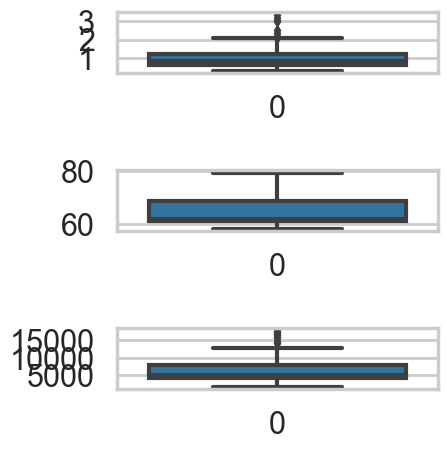

In [22]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data2['Carat'], ax = axs[0])
plt2 = sns.boxplot(data2['Depth'], ax = axs[1])
plt3 = sns.boxplot(data2['PricePerCt'], ax = axs[2])
plt.tight_layout()

In [23]:
# IQR
C_Q1 = np.percentile(data2['Carat'], 25,
                   interpolation = 'midpoint')
 
C_Q3 = np.percentile(data2['Carat'], 75,
                   interpolation = 'midpoint')
IQR1 = C_Q3 - C_Q1
IQR1



0.59

In [24]:
#Finding Upper and Lower limit
C_upper_limit = C_Q3 + 1.5 * IQR1
C_lower_limit = C_Q1 - 1.5 * IQR1

In [25]:
#Finding Outliers
data2[data2['Carat'] > C_upper_limit]
data2[data2['Carat'] < C_lower_limit]


,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice


In [26]:
# IQR
D_Q1 = np.percentile(data2['Depth'], 25,
                   interpolation = 'midpoint')
 
D_Q3 = np.percentile(data2['Depth'], 75,
                   interpolation = 'midpoint')
IQR2 = D_Q3 - D_Q1
IQR2


7.450000000000003

In [27]:
# IQR
P_Q1 = np.percentile(data2['PricePerCt'], 25,
                   interpolation = 'midpoint')
 
P_Q3 = np.percentile(data2['PricePerCt'], 75,
                   interpolation = 'midpoint')
IQR3 = P_Q3 - P_Q1
IQR3




3775.95

In [28]:
print("Highest allowed",data2['PricePerCt'].mean() + 3*data2['PricePerCt'].std())
print("Lowest allowed",data2['PricePerCt'].mean() - 3*data2['PricePerCt'].std())

Highest allowed 15200.069057009568
Lowest allowed -2614.3785032636297


In [29]:
data2[(data2['PricePerCt'] > 13159.2 ) | (data2['PricePerCt'] < -1229)]

,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
200,1.33,E,VVS1,60.8,14158.8,18831.2
206,1.54,F,VVS1,62.0,15525.0,23908.5
217,2.10,F,VS1,60.2,17367.8,36472.3
220,2.14,G,VS1,62.1,16023.2,34289.5
221,2.20,G,VS1,62.3,16409.3,36100.4
295,2.06,F,VVS1,70.5,14175.0,29200.5
298,3.01,F,VVS1,71.5,17671.5,53191.2
299,3.01,G,VS1,72.0,14782.5,44495.3
300,3.17,F,VVS2,71.5,17313.8,54884.6
301,3.35,F,VVS2,75.2,16852.1,56454.4


In [30]:
new_df = data2[(data2['PricePerCt'] < 13159.2) & (data2['PricePerCt'] > -1229)]
new_df

,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
0,1.08,E,VS1,68.6,6693.3,7228.8
1,0.31,F,VVS1,61.9,3159.0,979.3
2,0.32,F,VVS1,60.8,3159.0,1010.9
3,0.33,D,IF,60.8,4758.8,1570.4
4,0.33,G,VVS1,61.5,2895.8,955.6
...,...,...,...,...,...,...
302,1.52,F,SI2,63.4,4826.3,7335.9
303,0.97,G,VVS1,70.0,5177.3,5021.9
304,1.25,G,VS2,71.9,5607.9,7009.9
305,1.52,F,VS1,70.4,7634.3,11604.1


In [32]:
print("Highest allowed",new_df['Carat'].mean() + 3*new_df['Carat'].std())
print("Lowest allowed",new_df['Carat'].mean() - 3*new_df['Carat'].std())

Highest allowed 2.1514315096346164
Lowest allowed -0.30072443892754597


In [33]:
new_df[(new_df['Carat'] > 2.15 ) | (new_df['Carat'] < -0.3)]

,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
296,2.33,G,VS2,74.2,10428.8,24299.0
297,2.53,G,IF,74.3,12757.5,32276.5


In [35]:
new_data = new_df[(new_df['Carat'] < 2.15) & (new_df['Carat'] > -0.3)]
new_data

,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
0,1.08,E,VS1,68.6,6693.3,7228.8
1,0.31,F,VVS1,61.9,3159.0,979.3
2,0.32,F,VVS1,60.8,3159.0,1010.9
3,0.33,D,IF,60.8,4758.8,1570.4
4,0.33,G,VVS1,61.5,2895.8,955.6
...,...,...,...,...,...,...
302,1.52,F,SI2,63.4,4826.3,7335.9
303,0.97,G,VVS1,70.0,5177.3,5021.9
304,1.25,G,VS2,71.9,5607.9,7009.9
305,1.52,F,VS1,70.4,7634.3,11604.1


<AxesSubplot:>

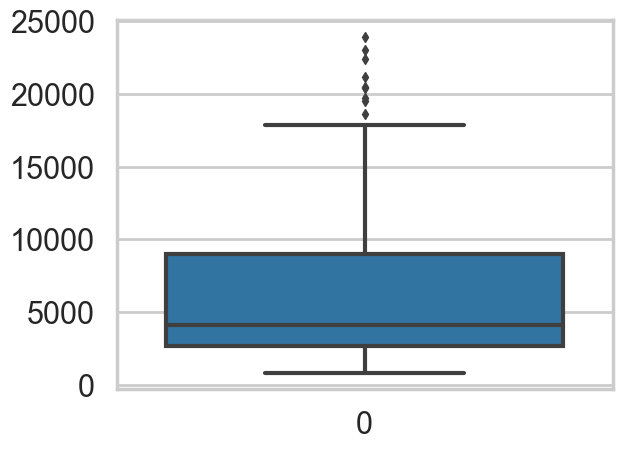

In [36]:
sns.boxplot(new_data['TotalPrice'])

In [38]:
new_data.columns

Index(['Carat', 'Color', 'Clarity', 'Depth', 'PricePerCt', 'TotalPrice'], dtype='object')

## Checking for Normality

In [39]:
import scipy.stats as stats
from scipy.stats import shapiro
stat, p = shapiro(new_data['TotalPrice'])
print('lambda=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

lambda=0.864, p=0.000
Sample does not look Gaussian (reject H0)


,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
0,1.08,E,VS1,68.6,6693.3,7228.8
1,0.31,F,VVS1,61.9,3159.0,979.3
2,0.32,F,VVS1,60.8,3159.0,1010.9
3,0.33,D,IF,60.8,4758.8,1570.4
4,0.33,G,VVS1,61.5,2895.8,955.6
...,...,...,...,...,...,...
302,1.52,F,SI2,63.4,4826.3,7335.9
303,0.97,G,VVS1,70.0,5177.3,5021.9
304,1.25,G,VS2,71.9,5607.9,7009.9
305,1.52,F,VS1,70.4,7634.3,11604.1


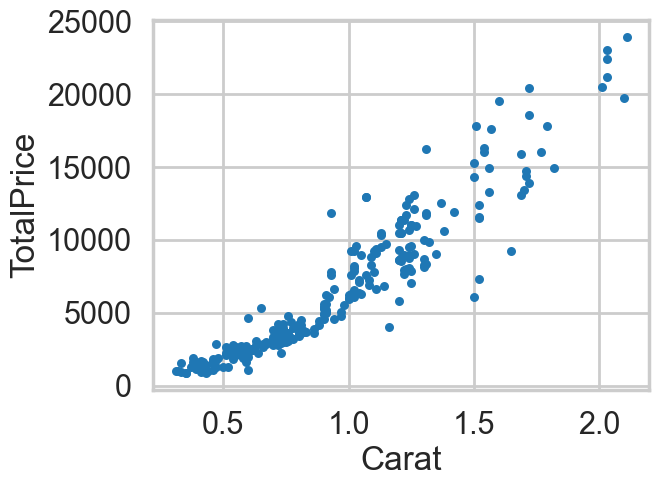

In [40]:
#Scatter Plot
new_data.plot(kind='scatter', x='Carat', y='TotalPrice')
new_data

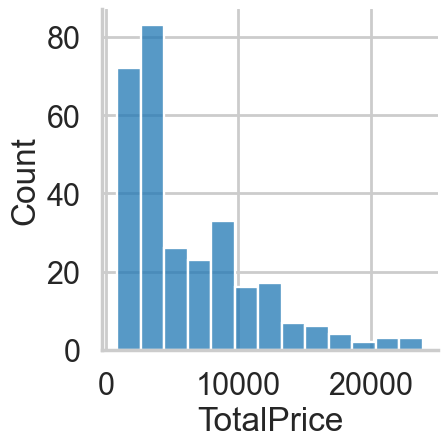

In [41]:
sns.displot(new_data['TotalPrice'])

In [42]:
#Unique values in Categorical columns

new_data.Clarity.unique()

array(['VS1', 'VVS1', 'IF', 'VVS2', 'VS2', 'SI1', 'SI3', 'SI2'],
      dtype=object)

In [43]:
new_data.Color.unique()

array(['E', 'F', 'D', 'G'], dtype=object)

In [44]:
from scipy.stats import f_oneway
CategoryGroupLists=new_data.groupby('Color')['TotalPrice'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])
#As the output of the P-value is greater, hence, we accept H0. Which means the variables are not correlated with each other.

P-Value for Anova is:  2.4576082679586423e-06


In [45]:
from scipy.stats import f_oneway
CategoryGroupLists=new_data.groupby('Clarity')['TotalPrice'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])
#As the output of the P-value is greater, hence, we accept H0. Which means the variables are not correlated with each other.

P-Value for Anova is:  0.07866191023004944


In [46]:
new_data.columns

Index(['Carat', 'Color', 'Clarity', 'Depth', 'PricePerCt', 'TotalPrice'], dtype='object')

In [47]:
new_data.shape

(295, 6)

## Assigning variables to x,y

In [48]:
#Creating Dummies
Datadummies=pd.get_dummies(new_data, columns=['Color', 'Clarity'], drop_first=True)
Datadummies

,Carat,Depth,PricePerCt,TotalPrice,Color_E,Color_F,Color_G,Clarity_SI1,Clarity_SI2,Clarity_SI3,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2
0,1.08,68.6,6693.3,7228.8,1,0,0,0,0,0,1,0,0,0
1,0.31,61.9,3159.0,979.3,0,1,0,0,0,0,0,0,1,0
2,0.32,60.8,3159.0,1010.9,0,1,0,0,0,0,0,0,1,0
3,0.33,60.8,4758.8,1570.4,0,0,0,0,0,0,0,0,0,0
4,0.33,61.5,2895.8,955.6,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1.52,63.4,4826.3,7335.9,0,1,0,0,1,0,0,0,0,0
303,0.97,70.0,5177.3,5021.9,0,0,1,0,0,0,0,0,1,0
304,1.25,71.9,5607.9,7009.9,0,0,1,0,0,0,0,1,0,0
305,1.52,70.4,7634.3,11604.1,0,1,0,0,0,0,1,0,0,0


In [49]:
Datadummies.columns

Index(['Carat', 'Depth', 'PricePerCt', 'TotalPrice', 'Color_E', 'Color_F',
       'Color_G', 'Clarity_SI1', 'Clarity_SI2', 'Clarity_SI3', 'Clarity_VS1',
       'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2'],
      dtype='object')

In [50]:
import sklearn
from sklearn.linear_model import LinearRegression

In [51]:
x1=Datadummies[['Carat', 'Depth', 'PricePerCt', 'Color_E', 'Color_F', 'Color_G','Clarity_SI1', 'Clarity_SI2', 'Clarity_SI3', 'Clarity_VS1','Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2']]
y=Datadummies[['TotalPrice']]

In [52]:
y

,TotalPrice
0,7228.8
1,979.3
2,1010.9
3,1570.4
4,955.6
...,...
302,7335.9
303,5021.9
304,7009.9
305,11604.1


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size = 0.30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30)
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)


(206, 13)
(89, 13)
(206, 1)
(89, 1)


In [54]:
regr = LinearRegression()
regr.fit(X_train, Y_train)
print(regr.score(X_train, Y_train))
print(regr.score(X_test, Y_test))

0.9710488878269974
0.9595096235775549


In [55]:
regr.intercept_

array([-2736.7119352])

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
K_fold_scores = cross_val_score(regr, x1, y, cv=5)


In [57]:
K_fold_scores

array([-2.93225064, -0.37811234,  0.84133669,  0.93292707,  0.93869013])

In [58]:
#Stats Model to fit
Xtrain_sm = sm.add_constant(X_train)
Train = sm.OLS(Y_train, Xtrain_sm).fit()
Train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     495.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          5.93e-140
Time:                        20:04:56   Log-Likelihood:                -1661.8
No. Observations:                 206   AIC:                             3352.
Df Residuals:                     192   BIC:                             3398.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2736.7119   1116.148     -2.452      0.015   -4938.198    -535.226
Carat         7563.8854    467.542     16.178      0.000    6641.707    8486.063
Depth          -46.6634     15.639     -2.984      0.003     -77.510     -15.816
PricePerCt       0.8584      0.065     13.234      0.000       0.730       0.986
Color_E        259.5672    183.674      1.413      0.159    -102.710     621.845
Color_F        149.9611    179.947      0.833      0.406    -204.966     504.888
Color_G        -94.3398    191.819     -0.492      0.623    -472.682     284.003
Clarity_SI1   -764.2818    406.659     -1.879      0.062   -1566.374      37.811
Clarity_SI2  -1375.6092    602.270     -2.284      0.023   -2563.524    -187.695
Clarity_SI3  -1459.5954    774.698     -1.884      0.061   -2987.608      68.417
Clarity_VS1   -286.3347    333.549     -0.858      0.392    -944.226     371.556
Clarity_VS2   -128.3974    354.831     -0.362      0.718    -828.265     571.470
Clarity_VVS1   315.8632    347.215      0.910      0.364    -368.983    1000.710
Clarity_VVS2   166.4240    352.555      0.472      0.637    -528.954     861.802
==============================================================================
Omnibus:                       79.413   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.090
Skew:                           1.656   Prob(JB):                     4.00e-51
Kurtosis:                       7.009   Cond. No.                     1.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
Train.params

const          -2736.711935
Carat           7563.885399
Depth            -46.663449
PricePerCt         0.858378
Color_E          259.567191
Color_F          149.961103
Color_G          -94.339836
Clarity_SI1     -764.281769
Clarity_SI2    -1375.609221
Clarity_SI3    -1459.595359
Clarity_VS1     -286.334697
Clarity_VS2     -128.397447
Clarity_VVS1     315.863246
Clarity_VVS2     166.424030
dtype: float64

In [60]:
Xtest_sm = sm.add_constant(X_test)
Test = sm.OLS(Y_test, Xtest_sm).fit()
Test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.51e-52
Time:                        20:05:02   Log-Likelihood:                -735.47
No. Observations:                  89   AIC:                             1497.
Df Residuals:                      76   BIC:                             1529.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -277.7046   2104.985     -0.132      0.895   -4470.146    3914.737
Carat         9933.4647    962.970     10.315      0.000    8015.545    1.19e+04
Depth          -86.0106     28.982     -2.968      0.004    -143.732     -28.289
PricePerCt       0.5959      0.154      3.874      0.000       0.290       0.902
Color_E         36.3613    344.671      0.105      0.916    -650.110     722.833
Color_F        160.1755    341.422      0.469      0.640    -519.826     840.177
Color_G       -189.6013    381.306     -0.497      0.620    -949.038     569.835
Clarity_SI1   -776.8106    736.033     -1.055      0.295   -2242.748     689.127
Clarity_SI2  -2487.5577    972.277     -2.558      0.013   -4424.014    -551.101
Clarity_SI3   2.431e-12   1.31e-12      1.855      0.067   -1.79e-13    5.04e-12
Clarity_VS1   -691.3801    558.969     -1.237      0.220   -1804.663     421.903
Clarity_VS2   -380.8863    613.210     -0.621      0.536   -1602.199     840.426
Clarity_VVS1   650.6428    694.736      0.937      0.352    -733.045    2034.330
Clarity_VVS2  -168.2213    636.266     -0.264      0.792   -1435.454    1099.011
==============================================================================
Omnibus:                        8.938   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.684
Skew:                           0.666   Prob(JB):                       0.0130
Kurtosis:                       3.752   Cond. No.                     1.62e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
Test.params

const          -2.777046e+02
Carat           9.933465e+03
Depth          -8.601063e+01
PricePerCt      5.959051e-01
Color_E         3.636128e+01
Color_F         1.601755e+02
Color_G        -1.896013e+02
Clarity_SI1    -7.768106e+02
Clarity_SI2    -2.487558e+03
Clarity_SI3     2.431007e-12
Clarity_VS1    -6.913801e+02
Clarity_VS2    -3.808863e+02
Clarity_VVS1    6.506428e+02
Clarity_VVS2   -1.682213e+02
dtype: float64

In [63]:
#Ridge and Lasso Regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
L1_model=Lasso(alpha=1)
L2_model=Ridge(alpha=1)
L1_model.fit(X_train,Y_train)
L2_model.fit(X_train,Y_train)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [64]:
L1_model.score(X_test,Y_test)

0.9589029931329841

In [65]:
L2_model.score(X_test,Y_test)

0.9509459344104835

In [66]:
Y_pred = regr.predict(X_test)

In [67]:
Y_pred

array([[16882.35254286],
       [ 8986.5213188 ],
       [ 8354.47580012],
       [ 3183.42517412],
       [13925.33414216],
       [ 1969.01815092],
       [ 9449.59682169],
       [12594.46059959],
       [10186.79035902],
       [ 2615.52489357],
       [18971.784915  ],
       [ 3901.16544655],
       [ 4060.62284351],
       [ 8719.07483753],
       [ 1007.08375524],
       [ 5467.34649987],
       [10349.48944053],
       [ 1513.40806964],
       [ 3630.02881887],
       [ 5952.75561175],
       [12229.69225476],
       [ 4777.81140438],
       [ 1219.0457477 ],
       [ 8135.03116165],
       [ 7847.35821178],
       [ 4437.74119062],
       [12122.02937217],
       [ 2304.61412279],
       [ 8113.22288676],
       [ 8679.76231457],
       [ 6175.61614786],
       [ 4290.3230374 ],
       [ 7129.26908397],
       [  329.06165657],
       [11195.60431239],
       [ 2253.07463851],
       [ 2119.22101582],
       [ 8930.01060122],
       [ 1283.3491644 ],
       [ -465.10886778],


In [68]:
df1=pd.DataFrame(X_test)
df1


,Carat,Depth,PricePerCt,Color_E,Color_F,Color_G,Clarity_SI1,Clarity_SI2,Clarity_SI3,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2
218,2.10,61.3,9396.0,0,0,1,0,1,0,0,0,0,0
262,1.20,72.6,7188.8,0,1,0,0,0,0,1,0,0,0
277,1.30,75.1,6264.0,0,1,0,1,0,0,0,0,0,0
77,0.66,60.0,4374.0,1,0,0,0,0,0,1,0,0,0
287,1.71,70.3,8424.0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.42,62.8,3422.3,0,0,0,0,0,0,0,0,0,1
222,0.73,64.4,3044.3,1,0,0,0,1,0,0,0,0,0
82,0.70,62.7,4738.5,1,0,0,0,0,0,1,0,0,0
35,0.46,61.8,3334.5,1,0,0,0,0,0,1,0,0,0


In [69]:
df2=pd.DataFrame(Y_pred)
df2

,0
0,16882.352543
1,8986.521319
2,8354.475800
3,3183.425174
4,13925.334142
...,...
84,613.707814
85,1276.917665
86,3672.868211
87,694.369517


In [70]:
df3=pd.DataFrame(Y_test)
df3

,TotalPrice
218,19731.6
262,8626.5
277,8143.2
77,2886.8
287,14405.0
...,...
26,1437.4
222,2222.3
82,3317.0
35,1533.9


In [72]:
df1.to_excel(r'C:\Users\Bhavani\Downloads\export_dataframe.xlsx',index=False,header=True)


In [ ]:
df2.to_excel(r'C:\Users\Bhavani\Downloads\Prediction.xlsx',index=False,header=True)


In [ ]:
df3.to_excel(r'C:\Users\Bhavani\Downloads\Test.xlsx',index=False,header=True)


Text(0.5, 1.0, 'Total Price vs Predicted Price')

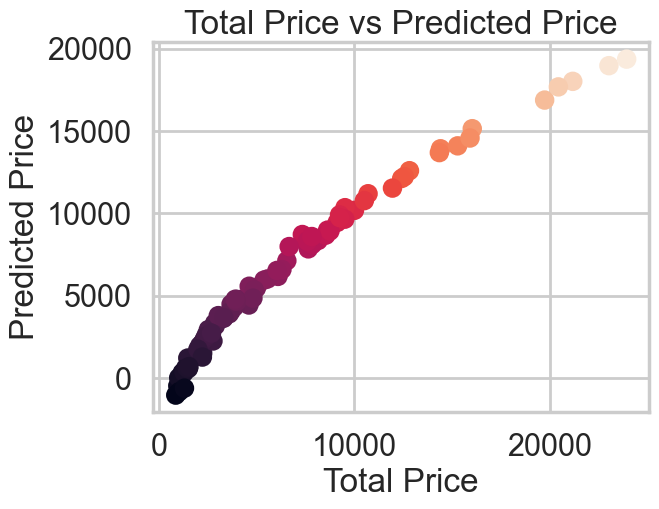

In [73]:
plt.scatter(Y_test, Y_pred, c=Y_pred)
plt.xlabel("Total Price")
plt.ylabel("Predicted Price")
plt.title("Total Price vs Predicted Price")

In [74]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Square Error:",mse)

Mean Square Error: 1180608.7993284517


In [75]:
print("Final rmse value is =",np.sqrt(np.mean((Y_test-Y_pred)**2)))

Final rmse value is = TotalPrice    1086.558236
dtype: float64


In [76]:
print ("Model Coeficients:"), regr.coef_

Model Coeficients:


(None,
 array([[ 7.56388540e+03, -4.66634493e+01,  8.58378421e-01,
          2.59567191e+02,  1.49961103e+02, -9.43398356e+01,
         -7.64281769e+02, -1.37560922e+03, -1.45959536e+03,
         -2.86334697e+02, -1.28397447e+02,  3.15863246e+02,
          1.66424030e+02]]))

In [77]:
print("Train Accuracy R-Square:",regr.score(X_train, Y_train)*100)

Train Accuracy R-Square: 97.10488878269973


In [78]:
print("Test Accuracy R-Square:",regr.score(X_test, Y_test)*100)

Test Accuracy R-Square: 95.95096235775549
